In [1]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np

# 1. Is the process stationary and invertible?

In [25]:
nSample = 200
ar = np.array([-0.8, -0.1]) # Auto Regresive parameters
ma = np.array([ 0.8])    # Moving Average parameters
arroots = np.polynomial.Polynomial(np.r_[1, ar]).roots()
maroots = np.polynomial.Polynomial(np.r_[1, ma]).roots()
if np.all(np.abs(arroots) > 1.0):
    print('It is STATIONARY because the AR roots are outside of unit circle')
else:
    print('It is NOT STATIONARY because AR the roots are inside of unit circle')
if np.all(np.abs(maroots) > 1.0):  
    print('It is INVERTIBLE because the MA roots are outside of unit circle')
else:
    print('It is NOT INVERTIBLE because MA the roots are inside of unit circle')    

It is STATIONARY because the AR roots are outside of unit circle
It is INVERTIBLE because the MA roots are outside of unit circle


# 3. Simulate 10 realisations with 200 observations

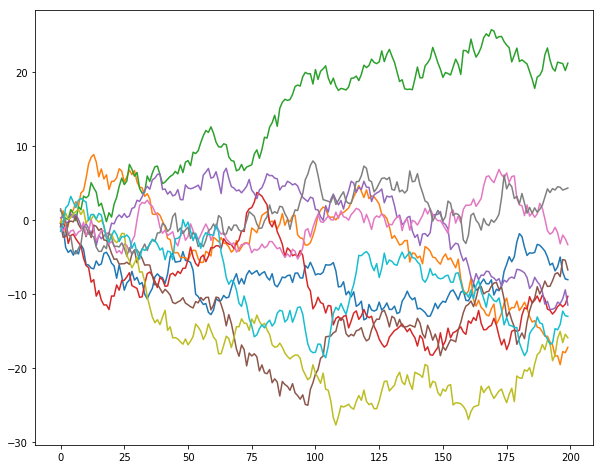

In [26]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf  
from statsmodels.graphics.tsaplots import plot_pacf  
plt.figure(figsize=(10, 8))

acfs = []
pacfs = []
for i in range(10):
    dParam = 1                  # Integrated parameter
    sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample)

    acfs.append(acf(sim1, nlags=25, alpha=0.95)[0])
    pacfs.append(pacf(sim1, nlags=25, alpha=0.95)[0])
    plt.plot(sim1)
plt.show()

# 4. and 5. Estimate the ACF for each realisation and plot those

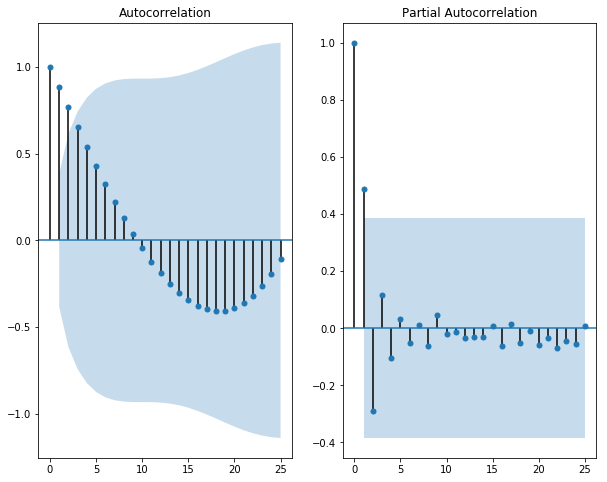

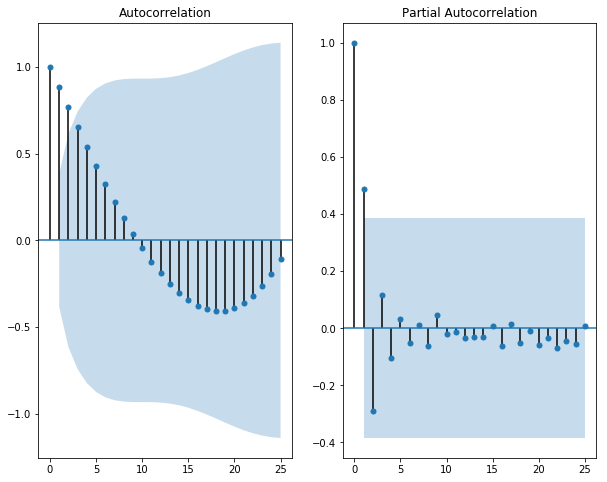

In [27]:
plt.figure(figsize=(10, 8))
layout = (1, 2)
acf_ax = plt.subplot2grid(layout, (0, 0))
pacf_ax = plt.subplot2grid(layout, (0, 1))

plot_acf(np.sum(np.array(acfs)/len(acfs), axis=0), lags=25, ax=acf_ax)
plot_pacf(np.sum(np.array(pacfs)/len(pacfs), axis=0), lags=25, ax=pacf_ax, method='ywm')

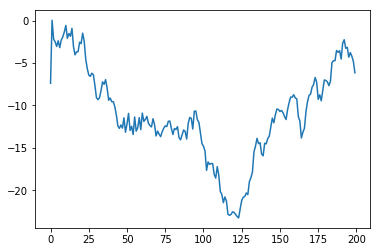

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  199
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -291.076
Method:                           mle   S.D. of innovations              1.044
Date:                Mon, 25 Mar 2019   AIC                            590.151
Time:                        18:04:13   BIC                            603.325
Sample:                             1   HQIC                           595.483
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.6075      0.104     -5.854      0.000      -0.811      -0.404
ar.L2.D.y     -0.0281      0.077     -0.364      0.716      -0.179       0.123
ma.L1.D.y      0.7984      0.077     10.406      0.000       0.648       0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7952           +0.0000j            1.7952            0.5000
AR.2          -19.8098           +0.0000j           19.8098            0.5000
MA.1           -1.2526           +0.0000j            1.2526            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
a1 = ARIMA(sim1, order = (2,1,1)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, (1, 0, 1)).fit()
plt.plot(model.fittedvalues)
plt.show()
a1.summary(alpha=0.05)

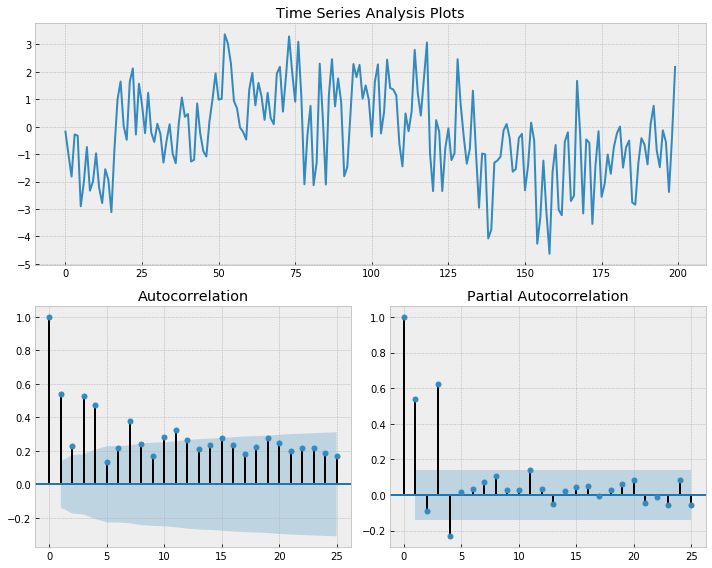

In [66]:
nSample = 200
ar = np.array([ 0.4, -0.3, 0.6]) # Auto Regresive parameters
ma = np.array([ 0.4])    # Moving Average parameters
dParam = 0                 # Integrated parameter
sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample)
tsplot(sim1)



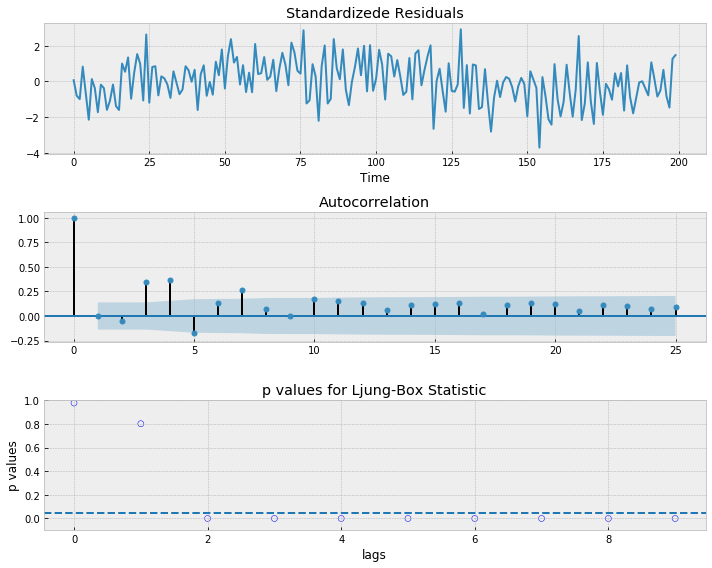

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(2, 1)   Log Likelihood                -322.346
Method:                           mle   S.D. of innovations              1.209
Date:                Mon, 25 Mar 2019   AIC                            654.693
Time:                        20:47:04   BIC                            671.184
Sample:                             0   HQIC                           661.367
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2480      0.171     -1.451      0.148      -0.583       0.087
ar.L1.y        0.1097      0.087      1.261      0.209      -0.061       0.280
ar.L2.y        0.0055      0.082      0.068      0.946      -0.155       0.166
ma.L1.y        0.7731      0.051     15.294      0.000       0.674       0.872
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.7907           +0.0000j            6.7907            0.0000
AR.2          -26.6002           +0.0000j           26.6002            0.5000
MA.1           -1.2934           +0.0000j            1.2934            0.5000
-----------------------------------------------------------------------------
"""

In [68]:

a1 = ARIMA(sim1, order = (2,0,1)).fit(method='mle', trend='c')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

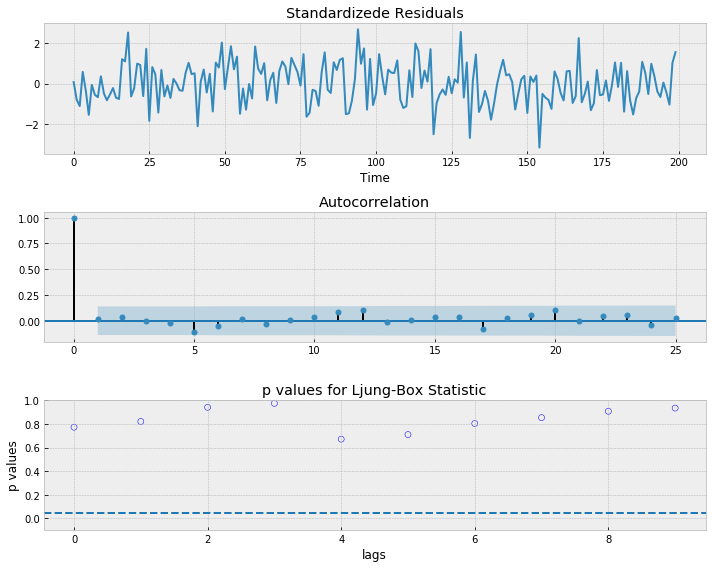

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(3, 1)   Log Likelihood                -288.766
Method:                           mle   S.D. of innovations              1.020
Date:                Mon, 25 Mar 2019   AIC                            589.532
Time:                        20:49:01   BIC                            609.322
Sample:                             0   HQIC                           597.541
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2598      0.332     -0.783      0.435      -0.910       0.390
ar.L1.y        0.4582      0.076      6.033      0.000       0.309       0.607
ar.L2.y       -0.3579      0.070     -5.114      0.000      -0.495      -0.221
ar.L3.y        0.6183      0.058     10.685      0.000       0.505       0.732
ma.L1.y        0.3326      0.090      3.713      0.000       0.157       0.508
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1529           -0.0000j            1.1529           -0.0000
AR.2           -0.2870           -1.1491j            1.1844           -0.2890
AR.3           -0.2870           +1.1491j            1.1844            0.2890
MA.1           -3.0062           +0.0000j            3.0062            0.5000
-----------------------------------------------------------------------------
"""

In [69]:

a1 = ARIMA(sim1, order = (3,0,1)).fit(method='mle', trend='c')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

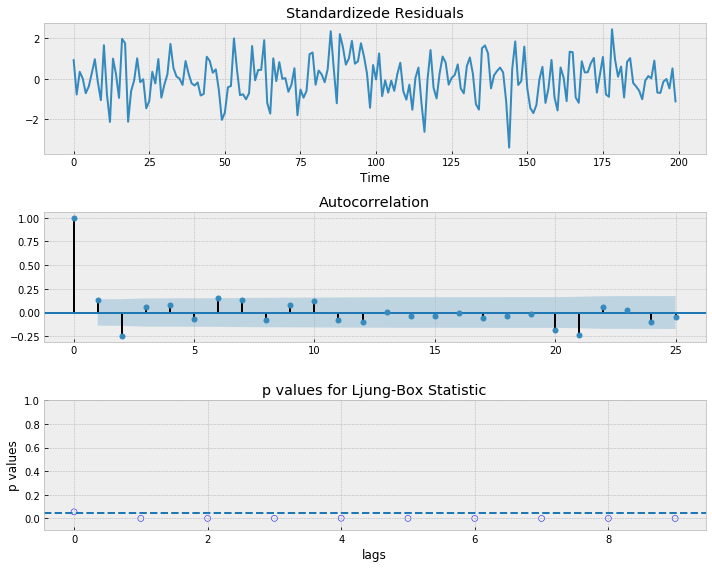

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(2, 0)   Log Likelihood                -285.258
Method:                           mle   S.D. of innovations              1.003
Date:                Mon, 25 Mar 2019   AIC                            576.515
Time:                        20:41:03   BIC                            586.410
Sample:                             0   HQIC                           580.520
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.2593      0.063     19.915      0.000       1.135       1.383
ar.L2.y       -0.4393      0.063     -6.956      0.000      -0.563      -0.316
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4333           -0.4711j            1.5088           -0.0505
AR.2            1.4333           +0.4711j            1.5088            0.0505
-----------------------------------------------------------------------------
"""

In [58]:

a1 = ARIMA(sim1, order = (2,0,0)).fit(method='mle', trend='nc')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

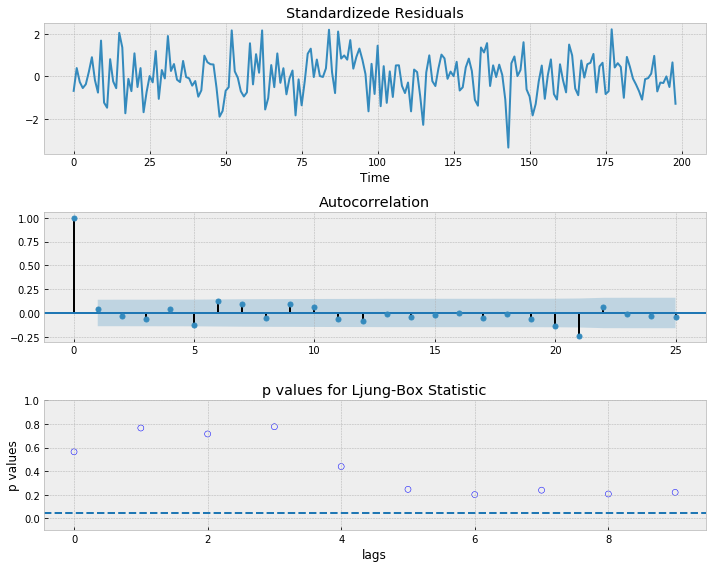

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 1)   Log Likelihood                -271.768
Method:                           css   S.D. of innovations              0.948
Date:                Mon, 25 Mar 2019   AIC                            549.537
Time:                        20:43:37   BIC                            559.417
Sample:                             1   HQIC                           553.536
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7751      0.047     16.533      0.000       0.683       0.867
ma.L1.y        0.6395      0.051     12.567      0.000       0.540       0.739
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2902           +0.0000j            1.2902            0.0000
MA.1           -1.5638           +0.0000j            1.5638            0.5000
-----------------------------------------------------------------------------
"""

In [62]:

a1 = ARIMA(sim1, order = (1,0,1)).fit(method='css', trend='nc')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)